In [3]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
df= pd.read_csv("F:\mechine_learning\Data\placement.csv")
df.head(5)

,si.no,cgpa,iq,placement
0,0,6.8,123,1
1,1,5.9,106,0
2,2,5.3,121,0
3,3,7.4,132,1
4,4,5.8,142,0


In [5]:
df.drop(columns=['si.no'],inplace=True)

In [6]:
df.isnull().sum()

cgpa         0
iq           0
placement    0
dtype: int64

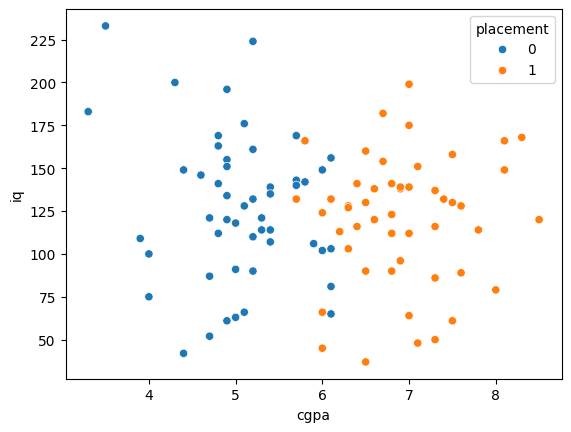

In [7]:
sns.scatterplot(x='cgpa',y='iq',data=df,hue='placement')
plt.show()

In [8]:
x = df.iloc[:,:-1]
y= df["placement"]

## For polynomial input

In [9]:
#from sklearn.preprocessing import PolynomialFeatures

#pf = PolynomialFeatures(degree=2)
#pf.fit(x)
#x= pd.DataFrame(pf.transform(x))

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)


In [11]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [12]:
lr.score(x_test,y_test)

0.85

In [13]:
lr.predict([[6.8,123]])

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [14]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred=lr.predict(x_test)

print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.15
0.4
0.15


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

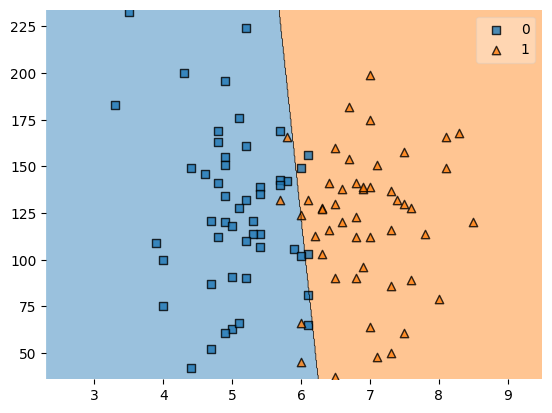

In [15]:
from mlxtend.plotting import plot_decision_regions
import numpy as np

plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=lr)
plt.show

In [16]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score  


In [19]:
cf= confusion_matrix(y_test,y_pred)
cf

array([[9, 1],
       [2, 8]], dtype=int64)

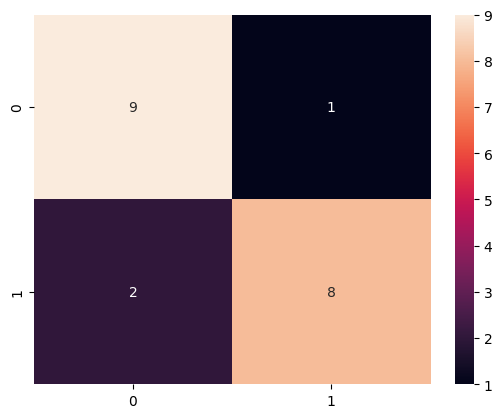

In [20]:
sns.heatmap(cf,annot=True)
plt.show()

In [21]:
precision_score(y_test,y_pred)*100

88.88888888888889

In [22]:
recall_score(y_test,y_pred)*100 

80.0

In [23]:
f1_score(y_test,y_pred)*100


84.21052631578948

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred),"\n")





              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.89      0.80      0.84        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85      0.85        20
 

